<div>
    <h1 style="text-align:center;"><img src="\img1.png" width=420> <b>RFM Analizi</b> ile <br>Müşteri Segmentasyonu </h1>
</div>

<div>
    <h1> İş Problemi</h1>
    <hr>
    <h3 style="text-align:center;" fontsize:35><img src="\img2.png" style="float:right" width=420>Online ayakkabı mağazası olan FLO müşterilerini
segmentlere ayırıp bu segmentlere göre pazarlama
stratejileri belirlemek istiyor. Buna yönelik olarak
müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.</h3>
</div>

<div>
    <h1> Veri Seti Hikayesi</h1>
    <hr>
     <h3 style="text-align:center;" fontsize:35>Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan)
olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır. </h3>
   <img src="\img3.png" style="float:left" width=850>
</div>

<h1> Proje Görevleri</h1>
    <hr>
    <h3> Görev 1: Veriyi Anlama ve Hazırlama </h3>
    <p> Projede kullanılacak olan kütüphaneleri çalışmamıza aktaralım </p>

In [ ]:
# !pip install squarify

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import squarify

colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

- Adım1: flo_data_20k.csv verisini okuyunuz. Dataframe'in kopyasını oluşturunuz.
- Adım2: Veri setinde
    - İlk 10 gözlem,
    - Değişken isimleri,
    - Betimsel istatistik,
    - Boş değer,
    - Değişken tipleri, incelemesi yapınız.

In [11]:
df_ = pd.read_csv("C:/Users/suley/bootcamp/crm/flo_data_20k.csv")
df = df_.copy()

In [12]:
def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(dataframe.isnull().sum())

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())


check_df(df)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(19945, 12)
**********************************************************************
******************************* Types ********************************
**********************************************************************
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
********

#### Veri Seti İle İlgili Aldığım Notlar
1. Tarih değişkenleri object olarak tanımlanmış. Tarih tipine değiştirilmesi gerekir.
2. Veri setinde boş gözlem yok.
3. Sipariş sayısında aykırı değerler var ancak bir skorlama işlemi yapılacağı için bir baskılama işlemine gerek yok.
4. Online alışveriş sayısı daha fazla
5. Ödenen toplam ücretlerde de bir aykırılık var. Ayrıca ortalama değer ve std arasındaki fark sağa doğru bir çarpıklık olduğunu gösteriyor.
6. En son alışveriş yapılan kanal ile alışveriş kanalı arasında eşsiz değer farkı var?
      - order_channel değişkeni sanırım müşterilerin üye olurken kullandığı kanal?
7. Tüm müşteriler en az 1'er kere hem online hemde offline alışveriş yapmış
8. Veri seti gruplanmış. Bu yüzden müşterilerin hangi aylarda/yıllarda/günlerde daha çok alışveriş yaptığını inceleyemiyorum. Ne yapılabilir? Örneğin yılları gruplayarak ilk alışveriş yılı üzerinden satın alınan toplam ürün ve maliyeti incelenebilir.

- __Adım 3__: Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam
alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [13]:
df["new_total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df["new_total_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

- __Adım 4__: Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [14]:
date_vars = df.columns[df.columns.str.contains("date")]
for col in date_vars:
    df[col] = pd.to_datetime(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

- __Adım 5__: Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

####################################################################################################
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64


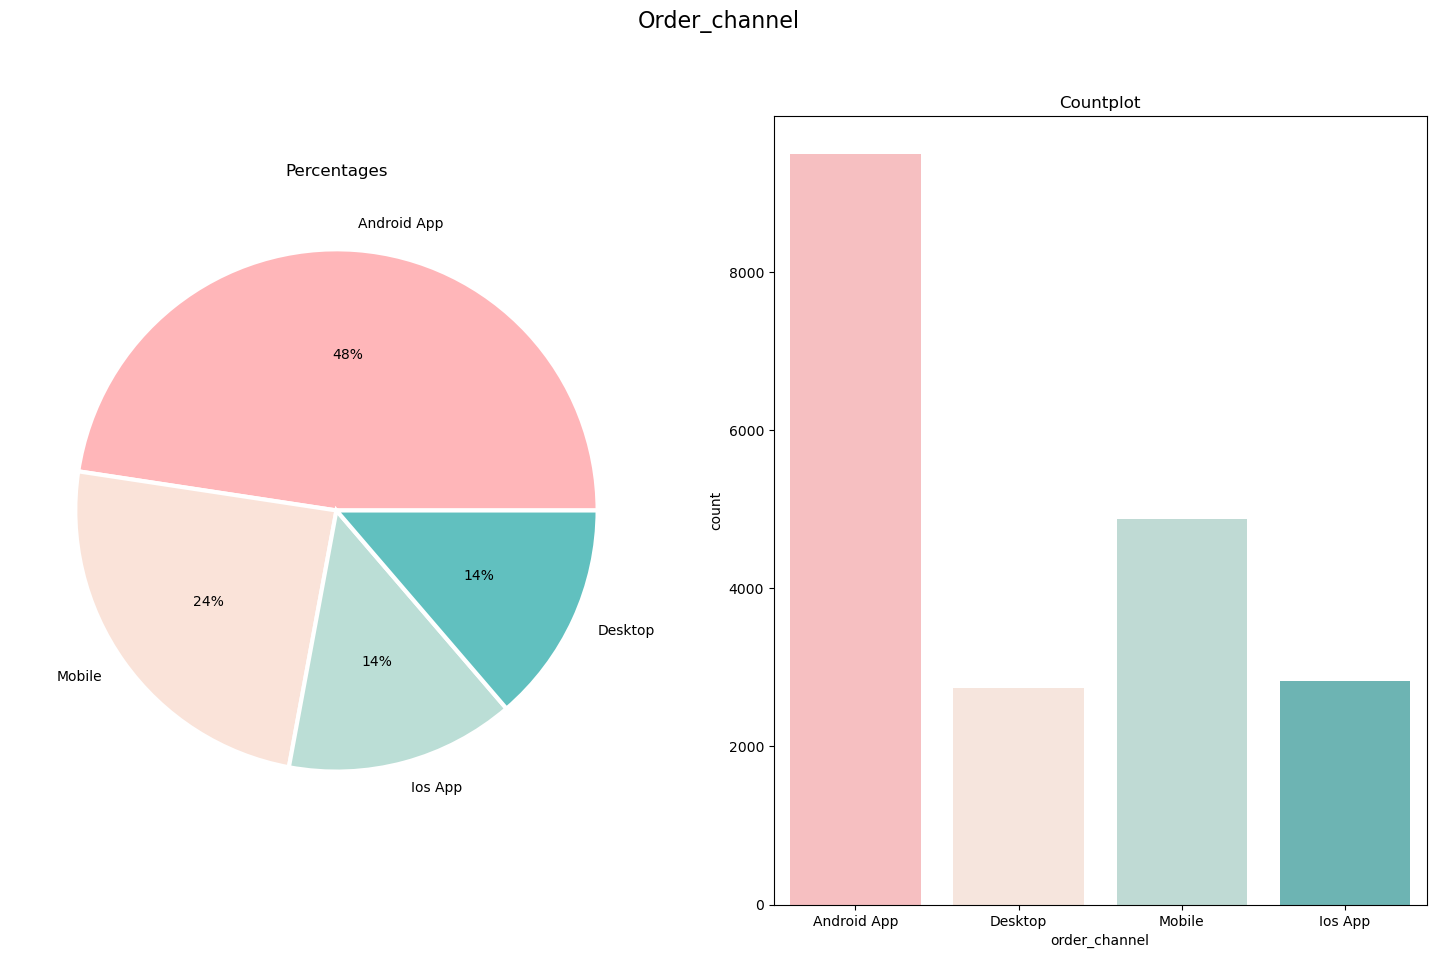

In [15]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())

    plt.figure(figsize=(15, 10))
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 2, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    plt.subplot(1, 2, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)
    plt.show(block=True)

cat_plots(df, "order_channel")

######################################################################
                count        mean          std    min        1%        5%      10%      50%       90%       95%        99%       max
order_channel                                                                                                                       
Android App    9495.0  823.492655   974.764418  55.98  120.9406  189.9700  240.868  601.940  1587.146  2114.015  3774.3788  45905.10
Desktop        2735.0  588.782984   636.342300  44.98  110.8634  161.4070  200.964  447.950  1055.678  1369.761  2722.6188  18443.57
Ios App        2833.0  891.634285  1200.294744  69.98  117.9400  210.4660  265.978  642.480  1653.202  2292.428  4499.4120  33918.10
Mobile         4882.0  620.275125   558.159747  44.98   99.9800  156.9935  200.720  469.305  1176.019  1558.663  2663.0472  12726.10
######################################################################


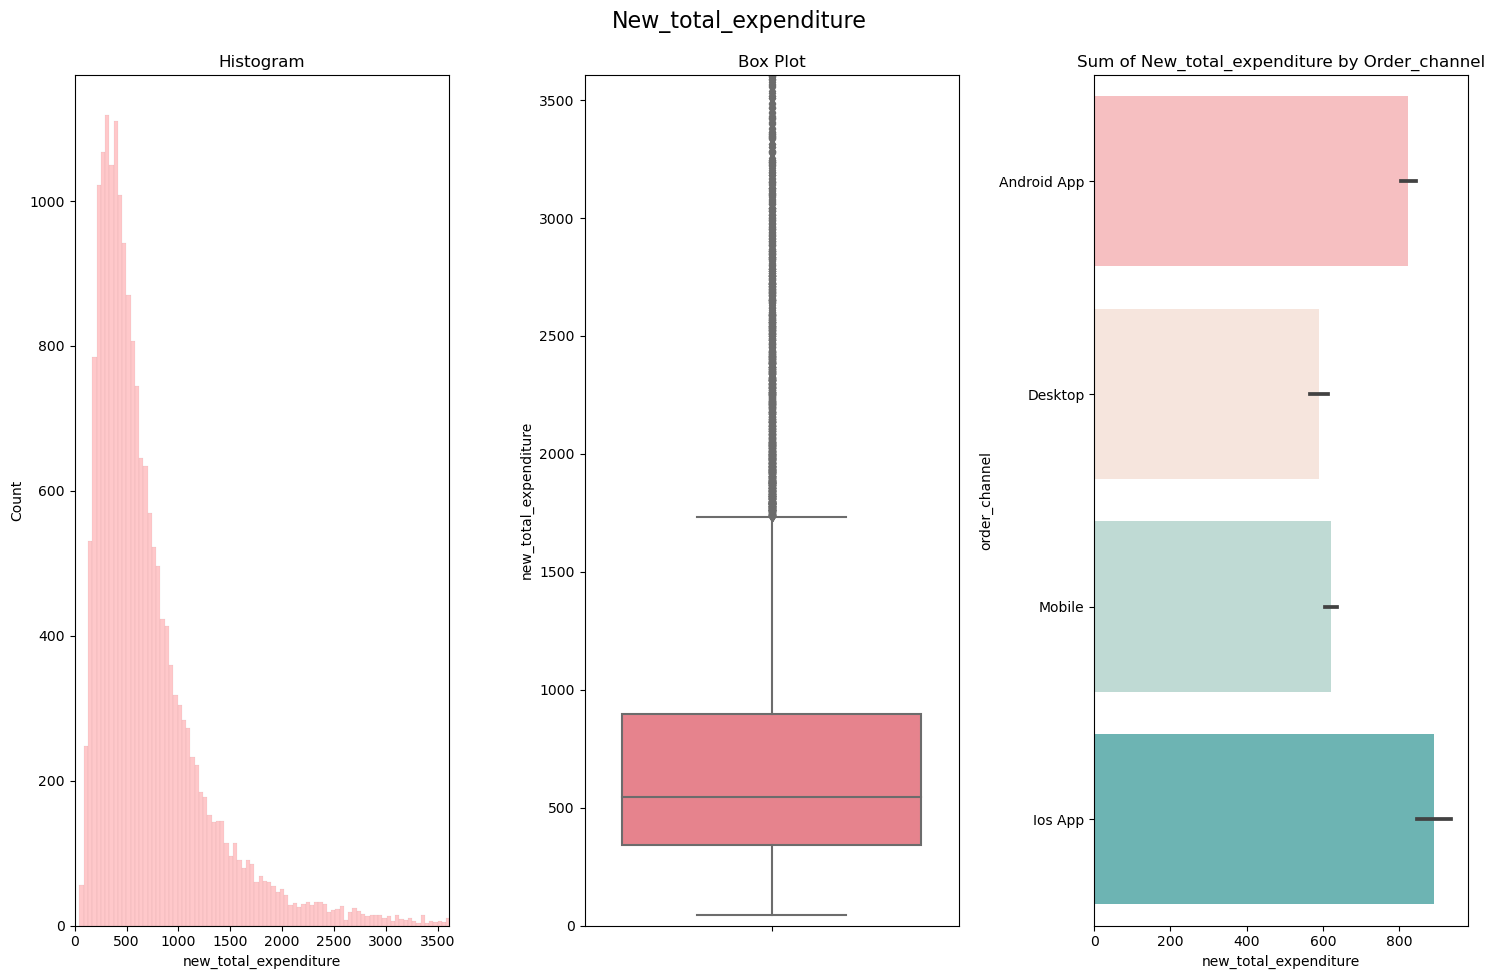

######################################################################
                count      mean       std  min   1%   5%  10%  50%   90%   95%    99%    max
order_channel                                                                               
Android App    9495.0  5.504897  5.245134  2.0  2.0  2.0  2.0  4.0  10.0  13.0  24.00  202.0
Desktop        2735.0  3.992687  3.206719  2.0  2.0  2.0  2.0  3.0   7.0   9.0  16.00   70.0
Ios App        2833.0  5.418637  5.246047  2.0  2.0  2.0  2.0  4.0   9.0  13.0  25.68   83.0
Mobile         4882.0  4.440598  3.897669  2.0  2.0  2.0  2.0  3.0   8.0  11.0  20.00   77.0
######################################################################


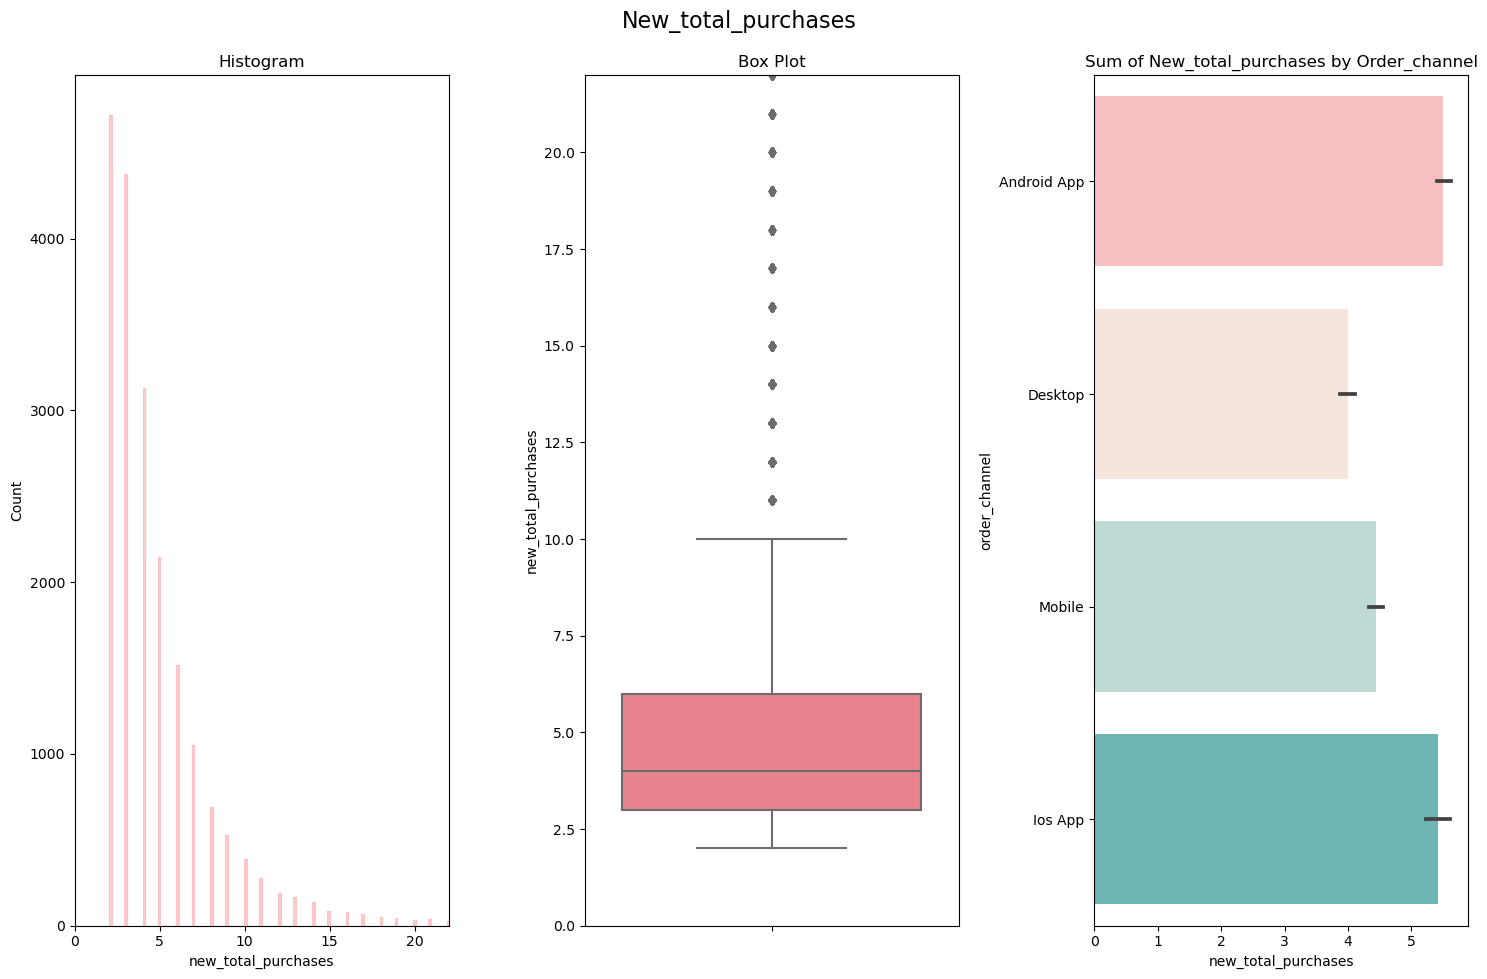

In [17]:
def num_summary(dataframe, col_name, target):
    quantiles = [.01, .05, .1, .5, .9, .95, .99]
    print("#" * 70)
    print(dataframe.groupby(target)[col_name].describe(percentiles=quantiles))
    print("#" * 70)
    xlim = dataframe[col_name].describe(quantiles).T["99%"]

    plt.figure(figsize=(15, 10))
    plt.suptitle(col_name.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Histogram")
    sns.histplot(dataframe[col_name], color="#FFB6B9")
    plt.xlim(0, xlim)

    plt.subplot(1, 3, 2)
    plt.title("Box Plot")
    sns.boxplot(data=dataframe, y=col_name, color="#F67280")
    plt.ylim(0, xlim)

    plt.subplot(1, 3, 3)
    sns.barplot(data=dataframe, x=col_name, y=target, palette=colors, estimator=np.mean)
    plt.title(f"Sum of {col_name.capitalize()} by {target.capitalize()}")
    plt.tight_layout(pad=1.5)
    plt.show(block=True)

for col in df.columns[df.columns.str.contains("new")]:
    num_summary(df, col, "order_channel")

- __Adım 6__: En fazla kazancı getiren ilk 10 müşteriyi sıralayınız.
- __Adım 7__: En fazla sipariş veren ilk 10 müşteriyi sıralayınız.

In [19]:
df[["master_id", "new_total_expenditure", "new_total_purchases"]].sort_values("new_total_expenditure", ascending=False).head(10)

,master_id,new_total_expenditure,new_total_purchases
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10,202.0
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29,68.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10,82.0
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41,11.0
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34,4.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57,70.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57,70.0
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10,37.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24,131.0
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.15,20.0


In [21]:
df[["master_id", "new_total_expenditure", "new_total_purchases"]].sort_values("new_total_purchases", ascending=False).head(10)

,master_id,new_total_expenditure,new_total_purchases
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10,202.0
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24,131.0
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,10383.44,111.0
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,8572.23,88.0
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,4240.36,83.0
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10,82.0
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,5184.05,77.0
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,5297.88,75.0
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57,70.0
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57,70.0


####################################################################################################
2019    10352
2020     4412
2018     1630
2017     1160
2016      662
2015      614
2021      581
2014      405
2013      129
Name: first_order_year, dtype: int64


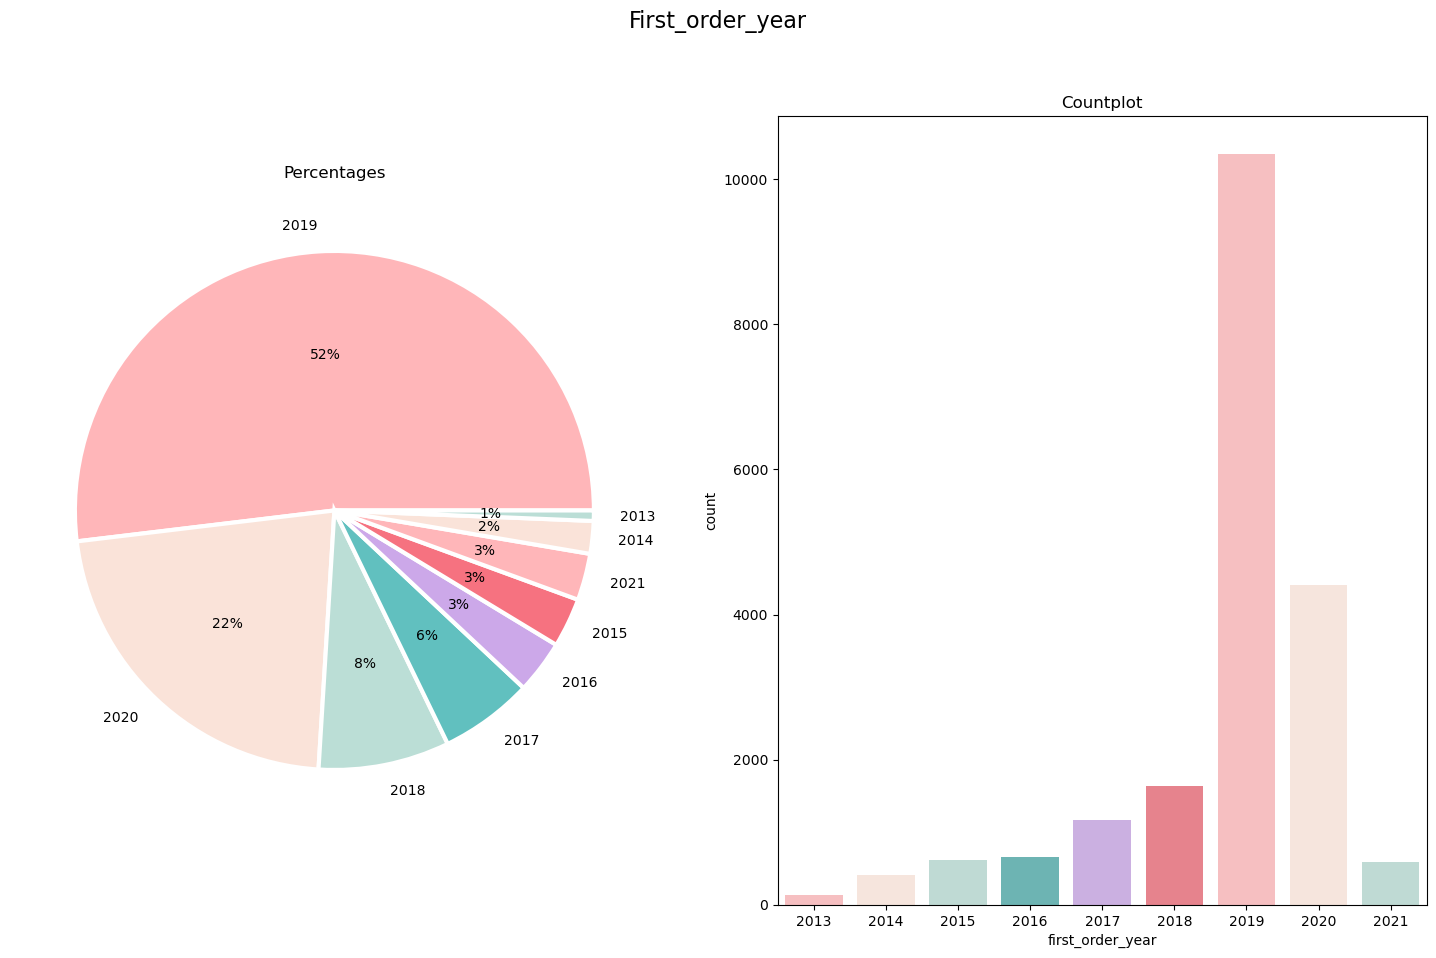

In [23]:
df["first_order_year"] = df["first_order_date"].dt.year
df["first_order_month"] = df["first_order_date"].dt.month_name()
df["first_order_day"] = df["first_order_date"].dt.day_name()
cat_plots(df, "first_order_year")
# 2019'da olan sıçrama ilgi çekici.

####################################################################################################
March        2108
November     2053
February     2038
October      1828
July         1745
September    1715
December     1606
April        1596
August       1525
January      1398
May          1233
June         1100
Name: first_order_month, dtype: int64


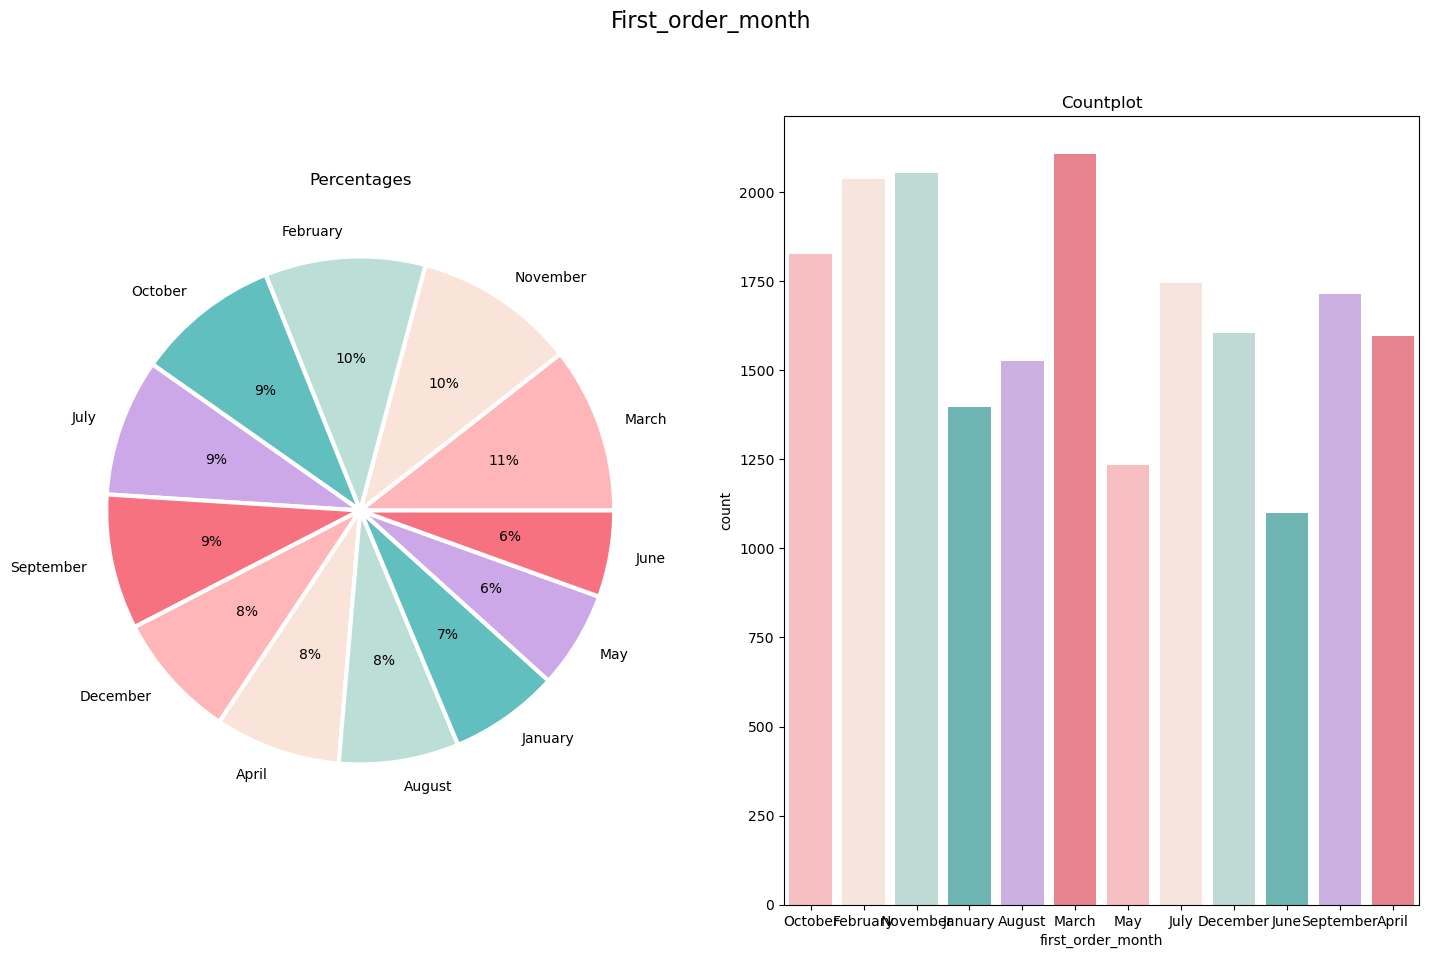

In [24]:
cat_plots(df, "first_order_month")

####################################################################################################
Saturday     3387
Sunday       3386
Monday       2680
Thursday     2655
Wednesday    2632
Friday       2631
Tuesday      2574
Name: first_order_day, dtype: int64


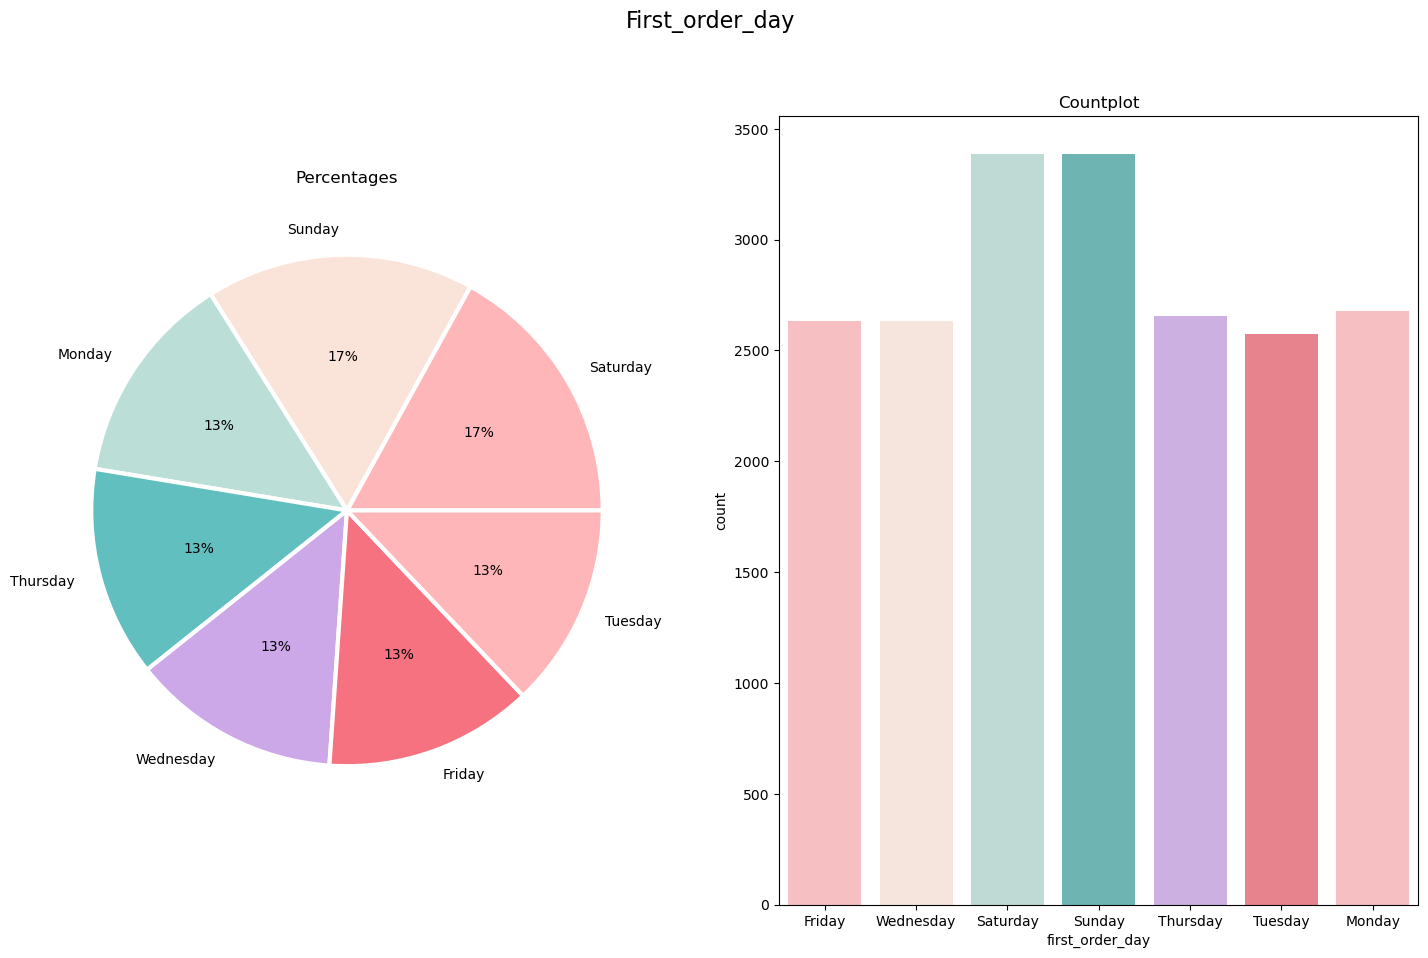

In [25]:
cat_plots(df, "first_order_day")

- __Adım 8__ : Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [28]:
del df
df

NameError: name 'df' is not defined

In [30]:
def preprocess(path):
    df_ = pd.read_csv(path)
    df = df_.copy()
    df["new_total_expenditure"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
    df["new_total_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
    date_vars = df.columns[df.columns.str.contains("date")]
    for col in date_vars:
        df[col] = pd.to_datetime(df[col])
    return df

df = preprocess("C:/Users/suley/bootcamp/crm/flo_data_20k.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,new_total_expenditure,new_total_purchases
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],939.37,5.0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.55,21.0
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",585.32,5.0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",121.97,2.0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],209.98,2.0


# __Görev 2__: RFM Metriklerinin Hesaplanması 

In [32]:
def rfm_table(dataframe):
    max_date = (dataframe["last_order_date"].max() + dt.timedelta(days=2))
    rfm = pd.DataFrame({
        "Recency": (max_date - dataframe["last_order_date"]),
        "Frequency": dataframe["new_total_purchases"],
        "Monetary": dataframe["new_total_expenditure"]
    })
    rfm["Recency"] = rfm["Recency"].apply(lambda x: x.days)
    return rfm

rfm = rfm_table(df)
rfm.head()

,Recency,Frequency,Monetary
0,95,5.0,939.37
1,105,21.0,2013.55
2,186,5.0,585.32
3,135,2.0,121.97
4,86,2.0,209.98


# __Görev 3__: RF Skorunun Hesaplanması

In [41]:
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm["Frequency_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm["Monetary_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=[1, 2, 3, 4, 5])
rfm["RF_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str)

rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score
0,95,5.0,939.37,3,4,4,34
1,105,21.0,2013.55,3,5,5,35
2,186,5.0,585.32,2,4,3,24
3,135,2.0,121.97,3,1,1,31
4,86,2.0,209.98,3,1,1,31


# Görev 4: RF Skorunun Segment Olarak Tanımlanması

In [42]:
seg_map = {
    r"[1-2][1-2]": "hibernating",
    r"[1-2][3-4]": "at_Risk",
    r"[1-2]5": "cant_loose",
    r"3[1-2]": "about_to_sleep",
    r"33": "need_attention",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions"
}
rfm["Segment"] = rfm["RF_Score"].replace(seg_map, regex=True)

# Görev 5: Aksiyon Zamanı!
- __Adım 1__: Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [43]:
rfm.groupby("Segment").agg({"Recency": ["mean", "count"],
                           "Frequency": ["mean", "count"],
                           "Monetary": ["mean", "count"]})

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
about_to_sleep       113.785144  1629   2.401473  1629   359.008963  1629
at_Risk              241.606835  3131   4.472373  3131   646.610236  3131
cant_loose           235.444167  1200  10.698333  1200  1474.468217  1200
champions             17.106625  1932   8.934265  1932  1406.625109  1932
hibernating          247.949501  3604   2.394007  3604   366.267062  3604
loyal_customers       82.594763  3361   8.374591  3361  1216.818616  3361
need_attention       113.828676   823   3.727825   823   562.142965   823
new_customers         17.917647   680   2.000000   680   339.955544   680
potential_loyalists   37.155888  2938   3.304289  2938   533.184466  2938
promising             58.921175   647   2.000000   647   335.672705   647

######################################################################
                      count        mean        std    min     1%     5%    10%    50%    90%    95%    99%    max
Segment                                                                                                          
about_to_sleep       1629.0  113.785144  17.844827   84.0   84.0   86.0   89.0  113.0  138.0  141.0  145.0  145.0
at_Risk              3131.0  241.606835  65.273974  146.0  147.0  155.0  162.0  230.0  340.0  352.0  365.0  367.0
cant_loose           1200.0  235.444167  62.670447  146.0  147.0  152.0  160.9  222.0  332.0  345.0  363.0  367.0
champions            1932.0   17.106625   9.144675    2.0    2.0    4.0    5.0   16.0   30.0   32.0   33.0   33.0
hibernating          3604.0  247.949501  67.475280  146.0  147.0  155.0  165.0  237.5  345.0  356.0  364.0  367.0
loyal_customers      3361.0   82.594763  32.176670   34.0   34.0   37.0   41.0   80.0  131.0  137.0  144.0  145.0
need_attention   

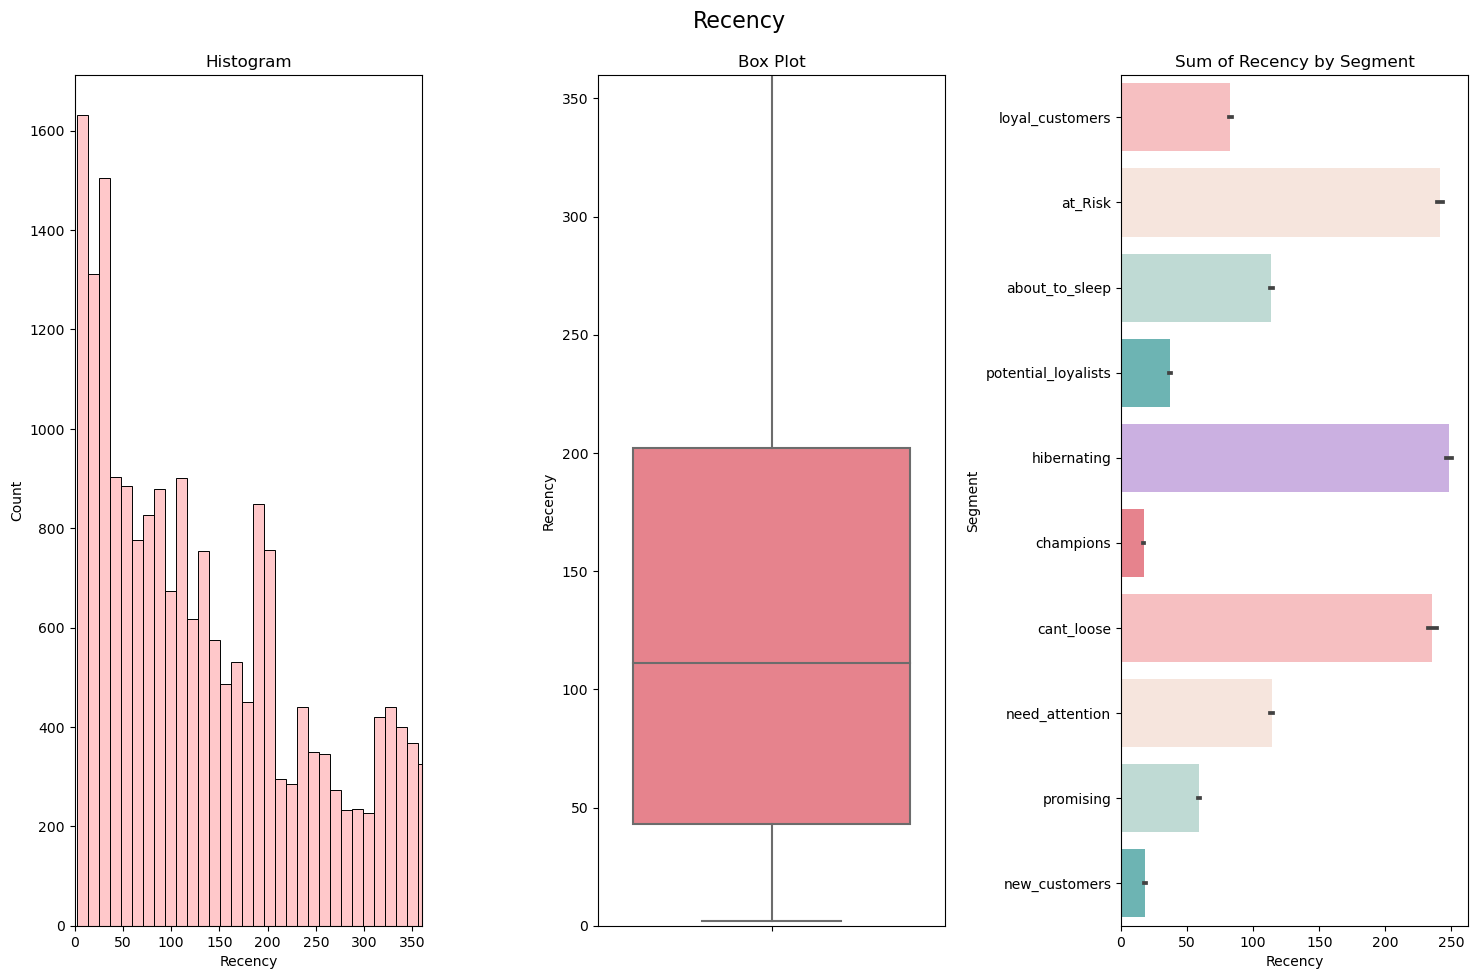

######################################################################
                      count       mean       std  min   1%   5%  10%  50%   90%    95%    99%    max
Segment                                                                                             
about_to_sleep       1629.0   2.401473  0.490347  2.0  2.0  2.0  2.0  2.0   3.0   3.00   3.00    3.0
at_Risk              3131.0   4.472373  0.979072  3.0  3.0  3.0  3.0  4.0   6.0   6.00   6.00    7.0
cant_loose           1200.0  10.698333  6.673538  7.0  7.0  7.0  7.0  9.0  16.0  21.00  36.01  111.0
champions            1932.0   8.934265  7.751736  4.0  4.0  5.0  5.0  7.0  14.9  19.45  31.69  202.0
hibernating          3604.0   2.394007  0.488704  2.0  2.0  2.0  2.0  2.0   3.0   3.00   3.00    3.0
loyal_customers      3361.0   8.374591  5.681879  4.0  4.0  5.0  5.0  7.0  13.0  18.00  30.00   83.0
need_attention        823.0   3.727825  0.445350  3.0  3.0  3.0  3.0  4.0   4.0   4.00   4.00    4.0
new_customers       

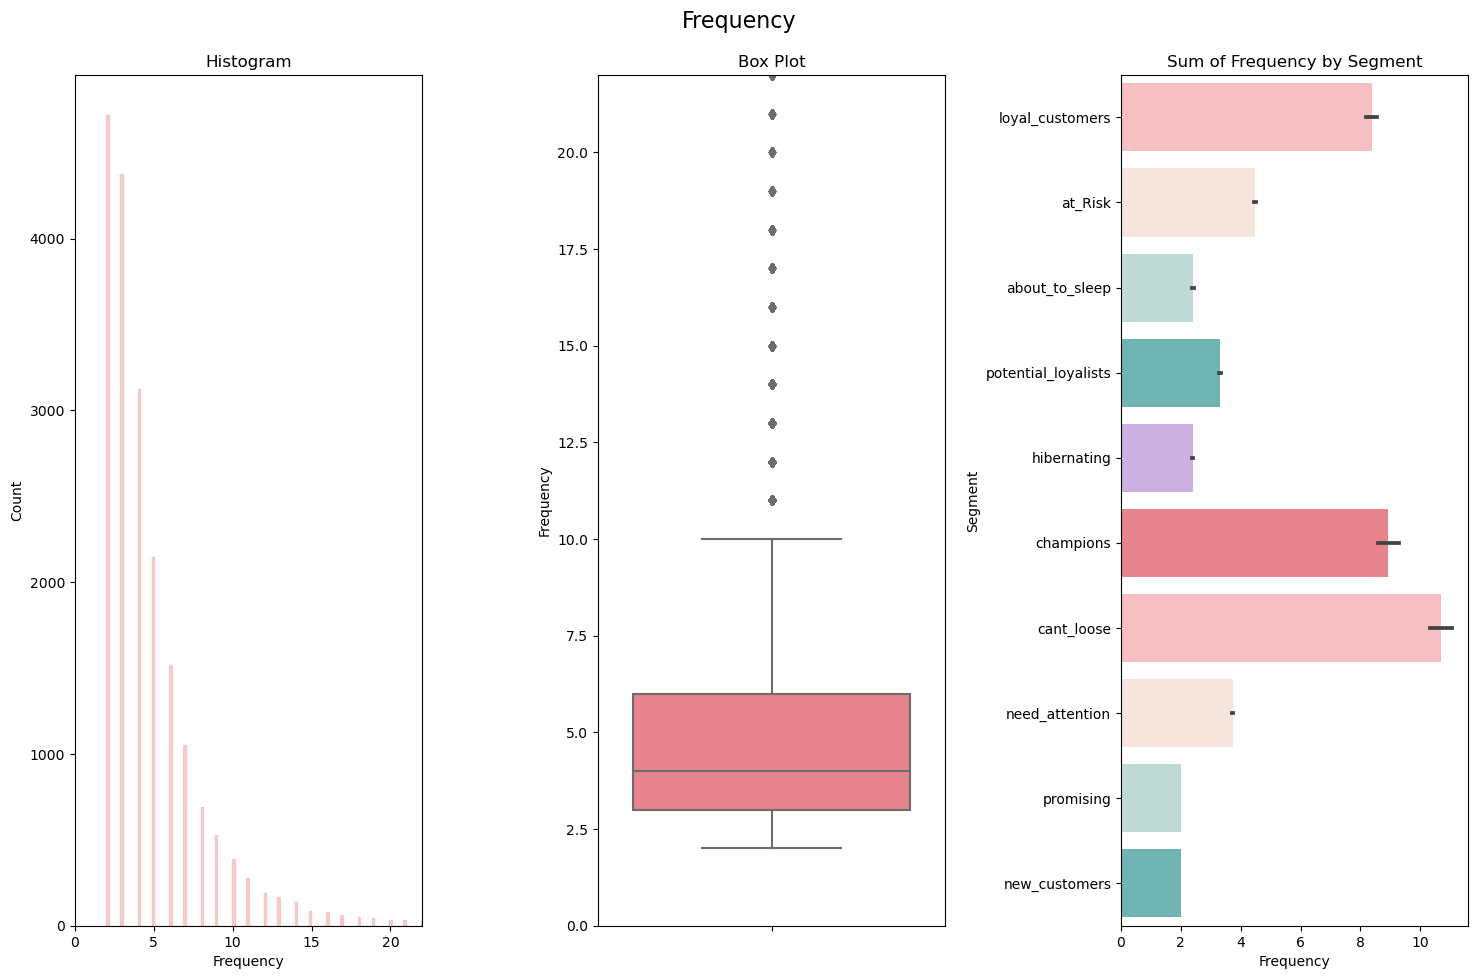

######################################################################
                      count         mean          std     min        1%        5%      10%       50%       90%        95%        99%       max
Segment                                                                                                                                       
about_to_sleep       1629.0   359.008963   187.749769   49.98   99.9800  137.6740  169.600   319.980   600.030   710.7880   950.6920   1607.45
at_Risk              3131.0   646.610236   313.267264   80.97  190.1110  267.7150  321.960   580.180  1040.880  1218.8550  1683.7830   3615.67
cant_loose           1200.0  1474.468217   995.070208  274.42  433.1816  607.4000  710.245  1203.465  2530.581  3113.6045  5321.1420  12103.15
champions            1932.0  1406.625109  1669.253097  250.34  353.8326  465.9020  548.577  1071.155  2481.317  3354.1725  5358.8619  45905.10
hibernating          3604.0   366.267062   209.528901   44.98   85.0097

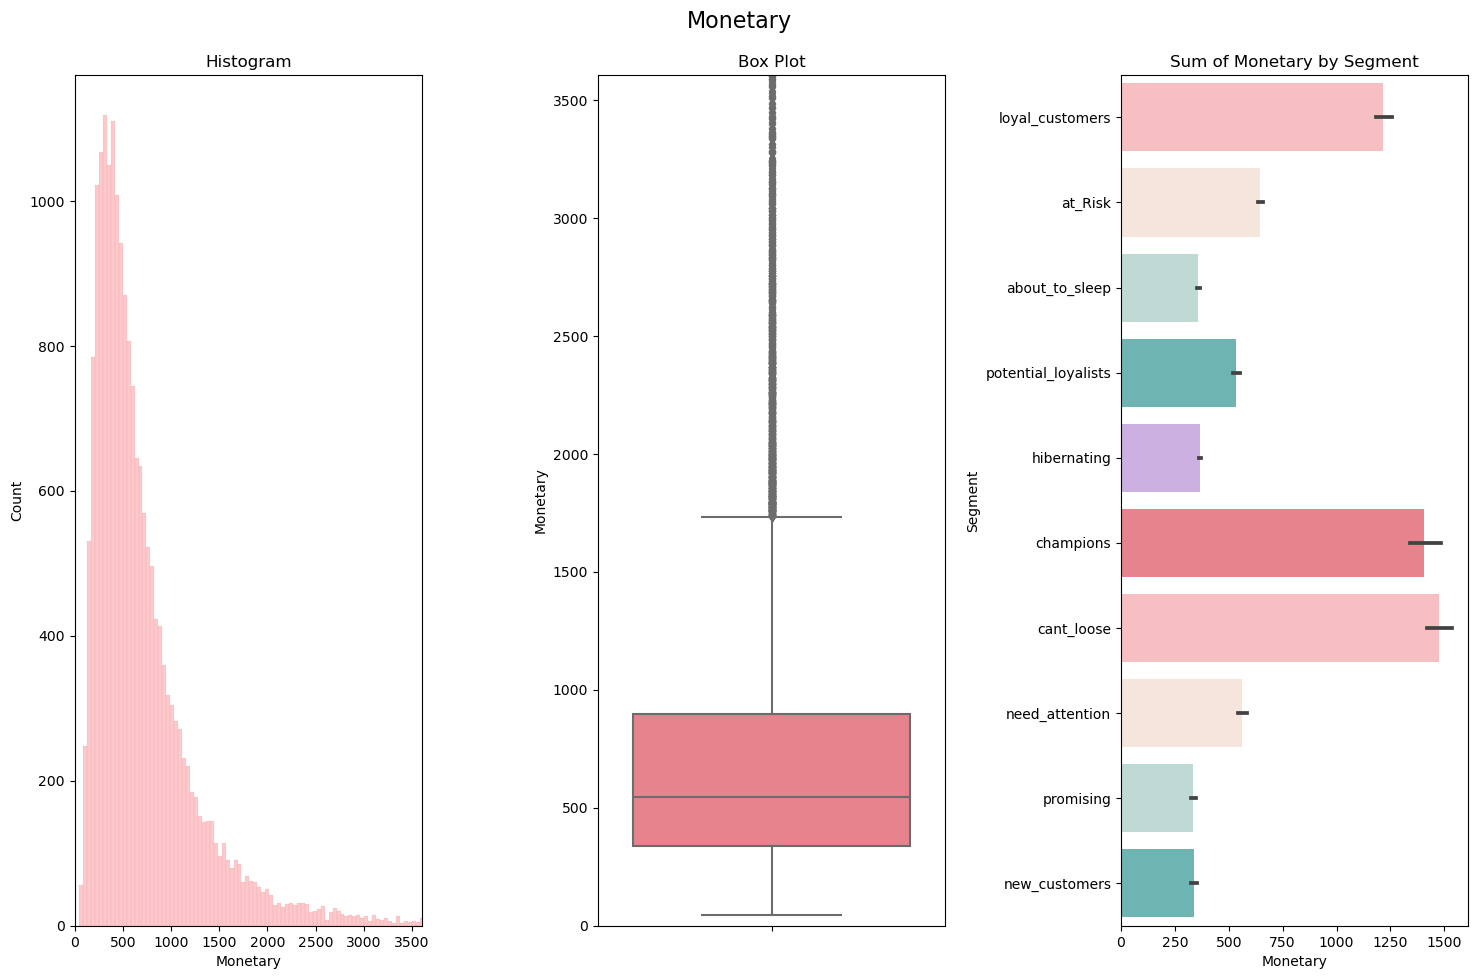

In [48]:
rfm_cols = ["Recency", "Frequency", "Monetary"]
for col in rfm_cols:
    num_summary(rfm, col, "Segment")

- __Adım 2__: RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.
    1. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri
        tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak
        iletişime geçmek isteniliyor. Sadık müşterilerinden(champions, loyal_customers) ve kadın kategorisinden alışveriş
        yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

In [44]:
case1 = df.loc[(rfm["Segment"]=="loyal_customers") | (rfm["Segment"]=="champions"),]
case1_index, case1_ids = zip( * [[row[0], row[1]] for row in case1.reset_index().to_numpy() if "KADIN" in row[-3]])
# https://stackoverflow.com/questions/10479319/possible-to-return-two-lists-from-a-list-comprehension

# case1_index[0:5] , case1_ids[0:5]
case1 = rfm.loc[case1_index, ]
case1["master_id"] = case1_ids
case1 = case1[case1.columns.tolist()[-1:] + case1.columns.tolist()[:-1]]
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
# case1.to_csv("case1", index=False)

2. Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [45]:
case2 = df.loc[(rfm["Segment"]=="about_to_sleep") | (rfm["Segment"]=="new_customers") | (rfm["Segment"]=="cant_loose"),]

case2_index, case2_ids = zip( * [[row[0], row[1]] for row in case2.reset_index().to_numpy() if ("COCUK" in row[-3] or "ERKEK" in row[-3])])
case2 = rfm.loc[case2_index, ]
case2["master_id"] = case2_ids
case2 = case2[case2.columns.tolist()[-1:] + case2.columns.tolist()[:-1]]
# case2.to_csv("case2", index=False)